In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
circ = pd.read_csv('concertriccir2.csv')
circ.head()

,X,Y,class
0,0.70,-0.247,0.0
1,-3.95,2.740,1.0
2,0.15,-2.160,1.0
3,-1.67,-0.942,1.0
4,2.56,-1.850,1.0


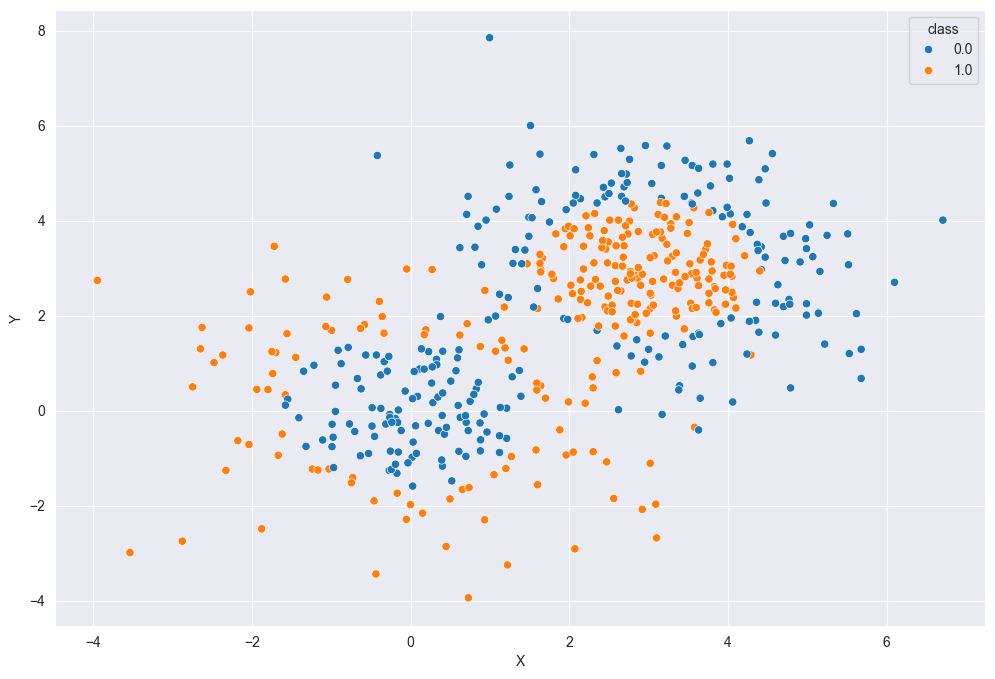

In [7]:
sns.scatterplot(x='X', y='Y', hue='class', data=circ)
plt.show()

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяющую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации)?

In [8]:
X = circ.drop('class', axis=1)
Y = circ['class']

In [9]:
from sklearn.linear_model import LogisticRegression

### Your code is here
model = LogisticRegression()
model.fit(X,Y)


LogisticRegression()

In [12]:
accuracy = model.score(X,Y)
accuracy

0.424

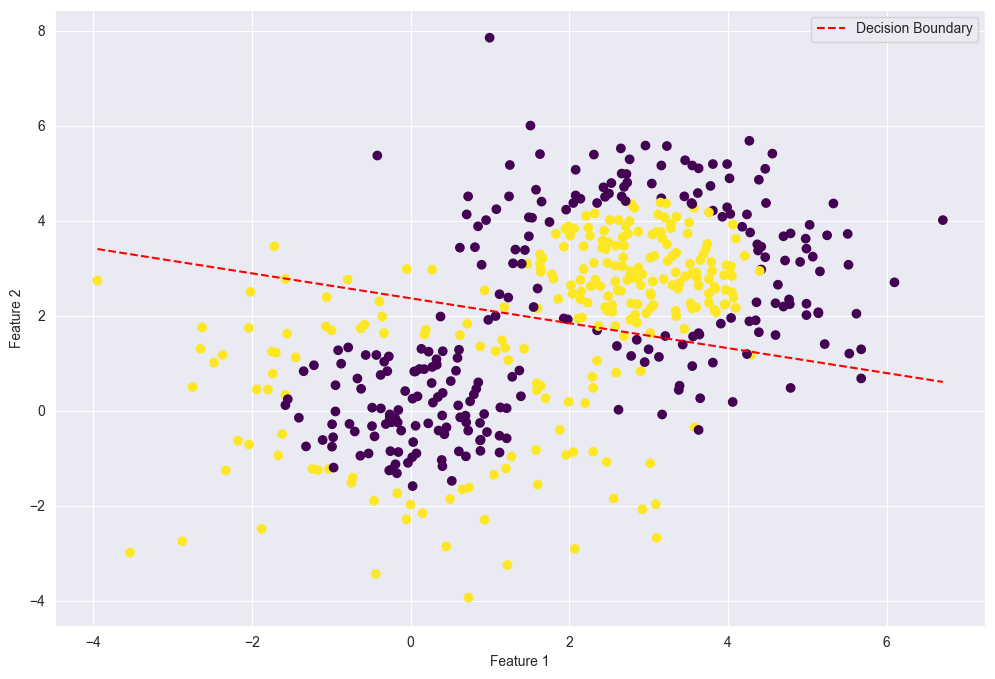

In [14]:
X_values = X.values
Y_values = Y.values.flatten() 
# Рисование данных
plt.scatter(X_values[:, 0], X_values[:, 1], c=Y_values, cmap='viridis', marker='o')

# Рисование разделяющей гиперплоскости
coef = model.coef_[0]
intercept = model.intercept_

x_vals = np.linspace(X_values[:, 0].min(), X_values[:, 0].max(), 100)
y_vals = (-coef[0] / coef[1]) * x_vals - intercept / coef[1]

plt.plot(x_vals, y_vals, '--', color='red', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy?

In [15]:
X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

In [17]:
X

array([[ 7.00e-01, -2.47e-01],
       [-3.95e+00,  2.74e+00],
       [ 1.50e-01, -2.16e+00],
       [-1.67e+00, -9.42e-01],
       [ 2.56e+00, -1.85e+00],
       [-1.72e+00,  3.46e+00],
       [ 1.90e-01,  1.70e+00],
       [-3.34e-01,  1.03e+00],
       [ 3.10e+00, -2.68e+00],
       [-1.24e+00, -1.23e+00],
       [-3.79e-01,  7.50e-01],
       [ 2.92e+00, -2.08e+00],
       [-2.67e-03, -1.98e+00],
       [ 7.49e-01,  1.95e-01],
       [ 1.60e+00, -1.56e+00],
       [ 4.96e-01, -1.86e+00],
       [ 2.07e+00, -2.91e+00],
       [-1.03e+00, -1.23e+00],
       [-1.06e+00,  2.39e+00],
       [-1.56e+00,  1.62e+00],
       [-1.45e+00,  1.12e+00],
       [ 8.59e-02,  2.99e-01],
       [ 1.72e-01,  1.60e+00],
       [ 3.52e-01, -4.20e-01],
       [ 4.25e-01, -4.98e-01],
       [ 8.78e-01,  1.35e+00],
       [ 1.89e-02, -9.82e-01],
       [-9.15e-01,  1.27e+00],
       [ 1.20e+00, -1.22e+00],
       [ 2.47e+00, -1.08e+00],
       [ 5.18e-01, -1.48e+00],
       [ 1.60e+00,  2.15e+00],
       [

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]
acc = {}
### Your code is here
for k in all_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy= knn.score(X_test, y_test)
    acc[k] = accuracy
print(acc)

{1: 0.89, 3: 0.87, 10: 0.85, 30: 0.74, 40: 0.75, 60: 0.73}


**Задание 3.** (бонусное) Скачайте библиотку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. 
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визулизацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

In [ ]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

In [ ]:
### Your code is here




1. Как меняется решающая поверхность с ростом числа соседей?
2. Какое оптимальное число соседей с точки зрения устройства данных и геометрии решающих поверхностей? Поясните свой ответ, опираясь на полученные графики.
3. Лучше ли справляется kNN по сравнению с логистической регрессией?

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [19]:
df = pd.read_csv('processed_sigma_cabs.csv')
df.head()

,Trip_Distance,Customer_Since_Months,Life_Style_Index,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Surge_Pricing_Type,Type_of_Cab_B,...,Destination_Type_F,Destination_Type_G,Destination_Type_H,Destination_Type_I,Destination_Type_J,Destination_Type_K,Destination_Type_L,Destination_Type_M,Destination_Type_N,Gender_Male
0,6.77,1.0,2.42769,3.90500,0,40.0,46,60,2,1,...,0,0,0,0,0,0,0,0,0,0
1,29.47,10.0,2.78245,3.45000,0,38.0,56,78,2,1,...,0,0,0,0,0,0,0,0,0,1
2,41.58,10.0,2.79805,3.50125,2,61.0,56,77,2,1,...,0,0,0,0,0,0,0,0,0,1
3,61.56,10.0,2.79805,3.45375,0,61.0,52,74,3,0,...,0,0,0,0,0,0,0,0,0,1
4,54.95,10.0,3.03453,3.40250,4,51.0,49,102,2,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
X = df.drop('Surge_Pricing_Type', axis=1)
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [29]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, shuffle=True, random_state=2022)

In [30]:
### Your code is here
all_k = [1, 5, 10]
acc = {}
### Your code is here
for k in all_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy= knn.score(X_test, y_test)
    acc[k] = accuracy
print(acc)

AttributeError: 'NoneType' object has no attribute 'split'

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
all_k = [1, 5, 10]
acc = {}
### Your code is here
for k in all_k:
    pipe = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    accuracy= knn.score(X_test_scaled, y_test)
    acc[k] = accuracy
print(acc)

AttributeError: 'NoneType' object has no attribute 'split'

**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. 
$$
\rho(x, z) = \bigg(\sum_i |x_i - z_i|^p\bigg) ^{1/p}
$$

Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`.

In [ ]:
### Your code is here





**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры $k \in [1, 2, ..., 9]$. 
3. Обучите kNN регрессор с гауссовским ядром, взяв параметр k из предыдущего пункта и подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

In [ ]:
X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot('longitude', 'latitude', data=X, hue=y);

In [ ]:
### Your code is here

